<font color="red"><h1><center>Pairs Trading Strategy</center></font></h1>

# Analysis Overview
In this work we define a Pairs Trading Strategy and the trading criteria to execute it. The strategy involves matching a long position with a short position in two stocks with a high correlation and cointegration, taking opportunistic trading decisions over abnormal returns.  
The first step was to choose an industry and identify a set of companies with similar activity. Having in consideration several metrics such as business activity, geography, revenues and levels of debt, we end up with a Peer Group of 6 companies: Mastercard (MA), Visa (V), Paypal (PYPL), American Express (AXP), WEC Inc. (WEX) and Fidelity National Information Services (FIS).
We get the data for each stock from yahoo finance and save them in csv format. We import it to our notebook and use several techniques in order to have an overview of the data, manipulating it in order to get homogeneous conditions and test for correlation on each of the pairs.

In [7]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr

In [24]:
# We want all available data from 01/01/2010 until 30/09/2019.
start_date = '2010-01-01'
end_date = '2019-09-30'

#We can do it for each ticker individually or assign a list of tickers but the output is not so visual-friendly
tickers = ['MA', 'V', 'PYPL', 'AXP', 'WEX', 'FIS']
panel_tickers = pdr.DataReader(tickers, 'yahoo', start_date, end_date)

# Use pandas_reader.data.DataReader to load the desired data for each ticker individually
MA = pdr.DataReader(['MA'], 'yahoo', start_date, end_date)
V = pdr.DataReader(['V'], 'yahoo', start_date, end_date)
PYPL = pdr.DataReader(['PYPL'], 'yahoo', start_date, end_date)
AXP = pdr.DataReader(['AXP'], 'yahoo', start_date, end_date)
WEX = pdr.DataReader(['WEX'], 'yahoo', start_date, end_date)
FIS = pdr.DataReader(['FIS'], 'yahoo', start_date, end_date)

#It is usefull to print out the type of the objects we are creating
type(panel_tickers)

pandas.core.frame.DataFrame

**Mastercard**

In [25]:
# Returning the first five rows and the last five rows of our panel data
MA

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,MA,MA,MA,MA,MA,MA
Date,,,,,,
2010-01-04,24.273087,25.684000,25.820000,25.607000,25.799000,9321000.0
2010-01-05,24.201258,25.608000,25.796000,25.305000,25.784000,12906000.0
2010-01-06,24.166269,25.556000,25.624001,25.250000,25.624001,10785000.0
2010-01-07,24.008350,25.389000,25.406000,25.098000,25.340000,11273000.0
2010-01-08,24.016859,25.398001,25.492001,25.170000,25.233000,8635000.0
2010-01-11,23.621586,24.980000,25.535999,24.788000,25.457001,11171000.0
2010-01-12,23.608349,24.966000,25.294001,24.856001,24.959000,8595000.0
2010-01-13,24.222059,25.615000,25.624001,24.966000,25.181000,8585000.0


**Visa**

In [49]:
V.head().append(V.tail())

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,V,V,V,V,V,V
Date,,,,,,
2010-01-04,20.488766,22.035000,22.192499,21.865000,22.000000,20180000.0
2010-01-05,20.253994,21.782499,21.882500,21.500000,21.825001,25833600.0
2010-01-06,19.982018,21.490000,21.770000,21.475000,21.752501,16254000.0
2010-01-07,20.167980,21.690001,21.750000,21.387501,21.492500,27841200.0
2010-01-08,20.223770,21.750000,21.847500,21.557501,21.705000,11907200.0
2019-09-24,174.479996,174.479996,177.199997,173.399994,176.110001,10039900.0
2019-09-25,175.279999,175.279999,175.669998,172.389999,173.800003,7797300.0
2019-09-26,175.649994,175.649994,176.449997,174.610001,175.649994,10419000.0


**Paypal**

In [50]:
PYPL.head().append(PYPL.tail())

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,PYPL,PYPL,PYPL,PYPL,PYPL,PYPL
Date,,,,,,
2015-07-06,36.709999,36.709999,39.750000,36.000000,38.000000,5866600
2015-07-07,36.619999,36.619999,37.810001,36.000000,37.720001,7359000
2015-07-08,34.700001,34.700001,36.360001,34.529999,36.340000,5387700
2015-07-09,34.500000,34.500000,35.520000,33.990002,35.099998,3760100
2015-07-10,34.689999,34.689999,35.189999,33.980000,34.660000,4472800
2019-09-24,103.690002,103.690002,106.099998,102.730003,105.410004,6367900
2019-09-25,104.139999,104.139999,104.462997,101.540001,103.339996,5457300
2019-09-26,104.550003,104.550003,104.870003,103.220001,104.430000,4719800


**American Express**

In [51]:
AXP.head().append(AXP.tail())

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,AXP,AXP,AXP,AXP,AXP,AXP
Date,,,,,,
2010-01-04,35.248253,40.919998,41.099998,40.389999,40.810001,6894300.0
2010-01-05,35.170746,40.830002,41.230000,40.369999,40.830002,10641200.0
2010-01-06,35.739265,41.490002,41.669998,41.169998,41.230000,8399400.0
2010-01-07,36.318905,41.980000,42.240002,41.110001,41.259998,8981700.0
2010-01-08,36.292961,41.950001,42.480000,41.400002,41.759998,7907700.0
2019-09-24,117.719765,118.169998,120.199997,117.519997,118.889999,5128400.0
2019-09-25,118.666153,119.120003,119.440002,117.059998,117.860001,2742900.0
2019-09-26,118.456947,118.910004,120.029999,118.839996,119.309998,3411200.0


**WEC Inc.**

In [52]:
WEX.head().append(WEX.tail())

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,WEX,WEX,WEX,WEX,WEX,WEX
Date,,,,,,
2010-01-04,33.320000,33.320000,33.389999,32.349998,32.349998,271600
2010-01-05,32.880001,32.880001,33.310001,32.270000,33.180000,234900
2010-01-06,32.830002,32.830002,33.250000,31.980000,33.009998,203000
2010-01-07,32.230000,32.230000,32.900002,31.700001,32.750000,134800
2010-01-08,32.130001,32.130001,32.230000,31.790001,32.230000,99200
2019-09-24,200.460007,200.460007,204.020004,199.220001,203.029999,191900
2019-09-25,204.360001,204.360001,205.029999,198.729996,199.779999,211500
2019-09-26,203.000000,203.000000,204.639999,202.199997,204.100006,186500


**Fidelity National Information Services**

In [53]:
FIS.head().append(FIS.tail())

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,FIS,FIS,FIS,FIS,FIS,FIS
Date,,,,,,
2010-01-04,20.698387,23.820000,23.959999,23.440001,23.629999,4623700.0
2010-01-05,21.584717,24.840000,24.879999,23.930000,23.990000,4868800.0
2010-01-06,21.463068,24.700001,24.930000,24.540001,24.930000,2481200.0
2010-01-07,21.341408,24.559999,24.690001,24.410000,24.690001,3384900.0
2010-01-08,20.898249,24.049999,24.299999,23.860001,24.000000,2460000.0
2019-09-24,132.899994,132.899994,133.880005,131.500000,132.580002,2500500.0
2019-09-25,133.529999,133.529999,133.589996,130.839996,132.529999,2953400.0
2019-09-26,133.419998,133.419998,134.220001,132.729996,133.669998,2124000.0


In [55]:
#AXP = pd.read_csv('AXP.csv')
#FIS = pd.read_csv('FIS.csv')
#MA = pd.read_csv('MA.csv')
#WEX = pd.read_csv('WEX.csv')
#V = pd.read_csv('V.csv')
#PYPL = pd.read_csv('PYPL.csv')

In [ ]:
   # def Col (a,b,c,d,e,f):
   #     a=AXP.columns,
    #    b=FIS.columns,
     #   c=MA.columns,
   #     d=WEX.columns,
   #     e=V.columns,
   #     f=PYPL.columns,
        
  # dataaa=np.array([a,b,c,d,e,f])
  #  print(dataaa)

In [31]:
a=AXP.columns,
b=FIS.columns,
c=MA.columns,
d=WEX.columns,
e=V.columns,
f=PYPL.columns,
        
OutMat=np.array([a,b,c,d,e,f])
OutMat

array([[[['Adj Close', 'AXP'],
         ['Close', 'AXP'],
         ['High', 'AXP'],
         ['Low', 'AXP'],
         ['Open', 'AXP'],
         ['Volume', 'AXP']]],


       [[['Adj Close', 'FIS'],
         ['Close', 'FIS'],
         ['High', 'FIS'],
         ['Low', 'FIS'],
         ['Open', 'FIS'],
         ['Volume', 'FIS']]],


       [[['Adj Close', 'MA'],
         ['Close', 'MA'],
         ['High', 'MA'],
         ['Low', 'MA'],
         ['Open', 'MA'],
         ['Volume', 'MA']]],


       [[['Adj Close', 'WEX'],
         ['Close', 'WEX'],
         ['High', 'WEX'],
         ['Low', 'WEX'],
         ['Open', 'WEX'],
         ['Volume', 'WEX']]],


       [[['Adj Close', 'V'],
         ['Close', 'V'],
         ['High', 'V'],
         ['Low', 'V'],
         ['Open', 'V'],
         ['Volume', 'V']]],


       [[['Adj Close', 'PYPL'],
         ['Close', 'PYPL'],
         ['High', 'PYPL'],
         ['Low', 'PYPL'],
         ['Open', 'PYPL'],
         ['Volume', 'PYPL']]]], dtype=objec

In [34]:
a1=AXP.shape
b1=FIS.shape
c1=MA.shape
d1=WEX.shape
e1=V.shape
f1=PYPL.shape

In [35]:
Mshape=np.array([a1,b1,c1,d1,e1,f1])
Mshape

array([[2452,    6],
       [2452,    6],
       [2452,    6],
       [2452,    6],
       [2452,    6],
       [1068,    6]])

In [52]:
AXP1 = AXP.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
FIS1 = FIS.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
MA1 = MA.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
V1 = V.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
WEX1 = WEX.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)
PYPL1 = PYPL.drop(['Open', 'High', 'Low', 'Close', 'Volume'], axis=1)

In [53]:
a=AXP1.columns,
b=FIS1.columns,
c=MA1.columns,
d=WEX1.columns,
e=V1.columns,
f=PYPL1.columns,
        
OutMat1=np.array([a,b,c,d,e,f])
OutMat1

array([[[['Adj Close', 'AXP']]],


       [[['Adj Close', 'FIS']]],


       [[['Adj Close', 'MA']]],


       [[['Adj Close', 'WEX']]],


       [[['Adj Close', 'V']]],


       [[['Adj Close', 'PYPL']]]], dtype=object)

In [138]:
#Drop(range()) não está a funcionar

In [68]:
#AXP1.drop(range(11936-1067), inplace=True)
#FIS1.drop(range(2452-1068), inplace=True)
#MA1.drop(range(2452-1068), inplace=True)
#V1.drop(range(2452-1068), inplace=True)
#WEX1.drop(range(2452-1068), inplace=True)

In [131]:
a1=AXP1.shape
b1=FIS1.shape
c1=MA1.shape
d1=WEX1.shape
e1=V1.shape
f1=PYPL1.shape

In [69]:
Mshape1=np.array([a1,b1,c1,d1,e1,f1])
Mshape1

array([[2452,    6],
       [2452,    6],
       [2452,    6],
       [2452,    6],
       [2452,    6],
       [1068,    6]])

In [133]:
PYPL1.head()

,Date,Adj Close
0,2015-07-06,36.709999
1,2015-07-07,36.619999
2,2015-07-08,34.700001
3,2015-07-09,34.500000
4,2015-07-10,34.689999


In [134]:
AXP1.rename(columns={'Adj Close':'AXP' }, inplace=True)
FIS1.rename(columns={'Adj Close':'FIS' }, inplace=True)
MA1.rename(columns={'Adj Close':'MA' }, inplace=True)
V1.rename(columns={'Adj Close':'V' }, inplace=True)
WEX1.rename(columns={'Adj Close':'WEX' }, inplace=True)
PYPL1.rename(columns={'Adj Close':'PYPL' }, inplace=True)

In [70]:
PYPL1.head()

Attributes,Adj Close
Symbols,PYPL
Date,
2015-07-06,36.709999
2015-07-07,36.619999
2015-07-08,34.700001
2015-07-09,34.500000
2015-07-10,34.689999


In [136]:
AXP2 = AXP1.set_index('Date')
FIS2 = FIS1.set_index('Date')
MA2 = MA1.set_index('Date')
V2 = V1.set_index('Date')
WEX2 = WEX1.set_index('Date')
PYPL2 = PYPL1.set_index('Date')

In [137]:
#PYPL2.head()

In [73]:
DF = pd.concat([PYPL1, AXP1, FIS1, MA1, V1, WEX1], axis=1)

In [74]:
sort=True

In [75]:
DF

Attributes   Adj Close                                                  \
Symbols           PYPL         AXP         FIS          MA           V   
Date                                                                     
2010-01-04         NaN   35.248253   20.698387   24.273087   20.488766   
2010-01-05         NaN   35.170746   21.584717   24.201258   20.253994   
2010-01-06         NaN   35.739265   21.463068   24.166269   19.982018   
2010-01-07         NaN   36.318905   21.341408   24.008350   20.167980   
2010-01-08         NaN   36.292961   20.898249   24.016859   20.223770   
2010-01-11         NaN   35.877682   20.793976   23.621586   20.165663   
2010-01-12         NaN   36.353512   20.724457   23.608349   20.070353   
2010-01-13         NaN   36.465984   21.072041   24.222059   20.256313   
2010-01-14         NaN   36.924519   21.158941   24.631510   20.326052   
2010-01-15         NaN   36.673618   20.846107   24.836712   20.023861   
2010-01-19         NaN   37.166752   21.211079   25.035290   20.421360   
2010-01-20         NaN   37.184059   21.072041   24.906691   20.321402   
2010-01-21         NaN   36.474636   21.150251   24.445223   19.631001   
2010-01-22         NaN   33.386055   20.820044   23.811655   19.231180   
2010-01-25         NaN   32.693943   20.915632   23.872177   19.068462   
2010-01-26         NaN   32.962132   20.863495   23.509062   18.863897   
2010-01-27         NaN   33.455273   21.045969   24.239073   19.505474   
2010-01-28         NaN   32.382481   20.637562   23.588497   19.212584   
2010-01-29         NaN   32.581463   20.472460   23.631046   19.068462   
2010-02-01         NaN   33.057304   20.646257   23.963902   19.447359   
2010-02-02         NaN   33.758076   20.811352   23.882578   19.528725   
2010-02-03         NaN   33.161121   20.846107   23.411659   19.414816   
2010-02-04         NaN   32.468994   20.455080   21.003166   19.305569   
2010-02-05         NaN   32.745853   20.020609   20.873613   19.191658   
2010-02-08         NaN   31.828789   19.916338   21.408834   19.305569   
2010-02-09         NaN   32.477654   19.794685   21.129881   19.356710   
2010-02-10         NaN   32.659336   19.360205   21.456125   19.471945   
2010-02-11         NaN   33.126511   19.525305   21.654697   19.821150   
2010-02-12         NaN   33.238979   19.429724   21.321844   19.737343   
2010-02-16         NaN   34.277157   19.568760   21.304827   19.993422   
...                ...         ...         ...         ...         ...   
2019-08-19  107.669998  123.926033  138.519730  277.732880  179.740005   
2019-08-20  107.370003  120.957382  139.247787  276.704132  179.240005   
2019-08-21  109.820000  122.033272  137.831573  281.668091  180.940002   
2019-08-22  108.769997  121.804146  137.602188  280.429565  180.089996   
2019-08-23  106.040001  117.311333  134.111526  271.560364  175.229996   
2019-08-26  107.660004  118.078392  135.288361  276.094849  177.589996   
2019-08-27  107.449997  117.301369  136.365494  276.304626  178.380005   
2019-08-28  107.470001  118.636261  136.644745  277.902649  178.669998   
2019-08-29  109.209999  120.279976  136.963898  281.038849  181.169998   
2019-08-30  109.050003  119.911385  135.856857  281.028870  180.820007   
2019-09-03  106.750000  117.151939  136.205933  279.770386  179.199997   
2019-09-04  108.730003  117.948891  137.352859  285.753143  181.770004   
2019-09-05  111.459999  120.210243  138.679306  291.725861  184.729996   
2019-09-06  110.050003  119.732071  137.302994  291.026733  185.740005   
2019-09-09  105.430000  119.463097  133.483200  283.016449  181.550003   
2019-09-10  103.050003  116.863037  131.009811  271.999817  176.350006   
2019-09-11  104.019997  117.550415  130.939987  269.622711  174.979996   
2019-09-12  107.099998  118.566528  133.440002  276.064880  177.979996   
2019-09-13  107.000000  118.745842  130.880005  275.984985  177.270004   
2019-09-16  106.519997  117.191788  133.059998  273.747681  176.110001   
2019

In [76]:
DF.isnull().sum()

Attributes  Symbols
Adj Close   PYPL       1384
            AXP           0
            FIS           0
            MA            0
            V             0
            WEX           0
dtype: int64

In [92]:
corr = DF.corr()
corr.style.background_gradient()

**Correlation Matrix**

In [109]:
corr

Attributes         Adj Close                                                  
Symbols                 PYPL       AXP       FIS        MA         V       WEX
Attributes Symbols                                                            
Adj Close  PYPL     0.000000  0.965147  0.958506  0.982417  0.985574  0.944737
           AXP      0.965147  0.000000  0.907302  0.919051  0.910525  0.952697
           FIS      0.958506  0.907302  0.000000  0.972973  0.988649  0.942456
           MA       0.982417  0.919051  0.972973  0.000000  0.993108  0.965416
           V        0.985574  0.910525  0.988649  0.993108  0.000000  0.954466
           WEX      0.944737  0.952697  0.942456  0.965416  0.954466  0.000000

In [134]:
# Returning maximum correlation
corr[corr == 1] = 0
def pairs_corr():
    for i in list(corr.columns):
        for j in list(corr.columns):
            if corr.loc[i,j]>0.99 and corr.loc[i,j] != 1:
                print (i, ' ',j ,' ', corr.loc[i,j])
pairs_corr()

('Adj Close', 'MA')   ('Adj Close', 'V')   0.9931083458161641
('Adj Close', 'V')   ('Adj Close', 'MA')   0.9931083458161641


In [136]:
#DF1 = DF.drop(['PYPL', 'AXP', 'FIS', 'WEX'], axis=1)

In [ ]:
DF1

# Testing
Having identified Visa and Mastercard as the Pair with the highest correlation, we move to the next phase of our work, the test of cointegration. The null hypothesis of our test is that Visa and Mastercard are cointegrated, i.e. that the ration between the two series will vary around a mean and thus disclosing a long-term relationship.
We want our test of cointegration to be statistically significant and we consider the “p-value” metric for representing the probability that random chance could explain the result.  In general, a 5% or lower p-value is considered to be statistically significant for a 95% confidence interval.  
  
We also have in consideration the minimum necessary sample size requirement. We compute it through the formula:  
  
<center>$n = Z-score^{2} * p * \frac{1-p}{Margin of Error^{2}}.$</center>  
        
Z-score is a numerical value that refers to a certain level of confidence interval. For a 95% confidence interval the z-score is 1.96. 
  
Assuming a proportion (p) of winning and loosing trades as 50%, and allowing a margin of error of 0.05, the necessary sample size is given by:  
  
<center>$n = 1.96^{2} * 0.5 * \frac{1-0.5}{0.05^{2}} = 384.$ . </center>  
  
This requirement is also fulfilled. 

In [157]:
import statsmodels

In [158]:
from statsmodels.tsa.stattools import coint

In [159]:
score, pvalue, _ =coint(DF1['V'],DF1['MA'])

In [160]:
print(pvalue) #the lower the better. <0.05 means the 2 stocks are statistically cointegrated.

0.004226399562928242


In [161]:
print(_)

[-3.90674333 -3.34186781 -3.04843101]


In [163]:
DF1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MA,1067.0,150.947317,59.601273,78.800056,96.012119,129.617401,198.386673,292.079987
V,1067.0,108.511320,33.905162,64.662224,77.622731,100.827026,136.769135,185.740005


In [171]:
import matplotlib.pyplot as plt

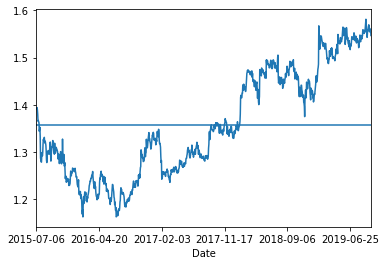

In [172]:
Spread = DF1['MA']/DF['V']
Spread.plot()
plt.axhline(Spread.mean())
plt.show()

In [173]:
Spread.describe()

count    1067.000000
mean        1.358185
std         0.114021
min         1.162448
25%         1.259137
50%         1.335784
75%         1.465562
max         1.581118
dtype: float64

Em 65% das vezes, o desvio padrao que se verifica é 0.11

# Trading
Our assumption is that over the long run the stock prices behaviour converges to a normal distribution with a positive tendency for prices.
The last step is to trade in the event of abnormal moves. We consider the spread of the 2 stocks (Visa/Mastercard) and we check for its standard deviation.
In our back testing, each time the spread moves 2 Standard Deviations we trade since the move only happens 4.56% of the time (1 - 95.44%) = 4.56%




In [105]:
from PIL import Image

In [111]:
myimage=Image.open('Normal.png');
#myimage.show()

NameError: name 'Print' is not defined

# Conclusion